<a href="https://colab.research.google.com/github/yenlung/ML-Demo/blob/main/%E3%80%90Demo03%E3%80%91%E9%9D%9E%E7%9B%A3%E7%9D%A3%E5%BC%8F%E5%AD%B8%E7%BF%92%E8%87%AA%E5%8B%95%E5%B9%AB%E4%BD%A0%E5%88%86%E9%A1%9E.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 讀入必要套件，準備數據

這裡準備用 4 類型的數據示範:

1. `uniform`
2. `blobs`
3. `moons`
4. `circles`

In [2]:
from sklearn.datasets import make_moons, make_circles, make_blobs
from sklearn.cluster import KMeans, DBSCAN

In [3]:
np.random.seed(42)

In [4]:
# uniform
uniform = np.random.rand(1000,2)

# bolbs
centers = [[1, 1], [-1, -1], [1, -1]]
blobs, _ = make_blobs(n_samples=300, centers=centers, cluster_std=0.4)

# moons
moons, _ = make_moons(n_samples=300, noise=0.05)

# circles
circles, _ = make_circles(n_samples=300, noise=0.05, factor=0.5)

Text(0.5, 1.0, 'circles')

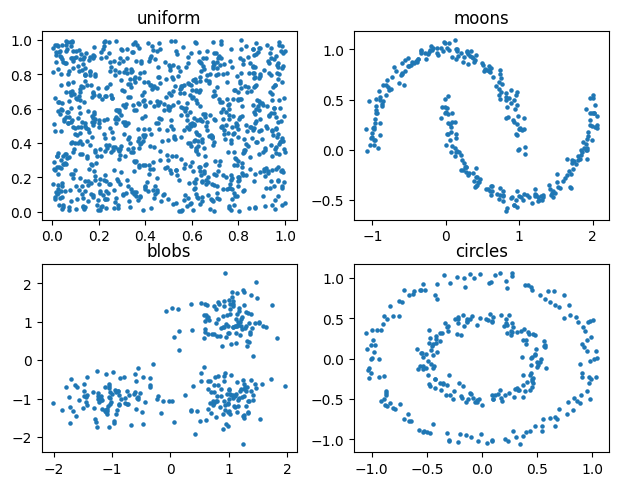

In [8]:
fig, axes = plt.subplots(2, 2)
fig.tight_layout()

plt.subplot(221)
plt.scatter(uniform[:,0], uniform[:,1], s=5)
plt.title('uniform')

plt.subplot(222)
plt.scatter(moons[:,0], moons[:,1], s=5)
plt.title('moons')

plt.subplot(223)
plt.scatter(blobs[:,0], blobs[:,1], s=5)
plt.title('blobs')

plt.subplot(224)
plt.scatter(circles[:,0], circles[:,1], s=5)
plt.title('circles')

## 2. `uniform` 數據

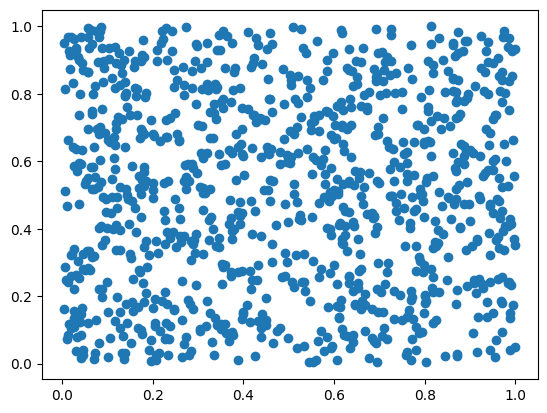

In [ ]:
plt.scatter(uniform[:,0], uniform[:,1])

### (1) K-Means 分類 `uniform` 數據集

#### step 1: 開一個 K-Means 函數學習機

In [9]:
kmeans = KMeans(n_clusters=3)

#### step 2: 訓練

注意是沒有「正確答案」的。

In [10]:
kmeans.fit(uniform)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

### 3. 預測

這答案是 K-Means 自己說的, 所以預測當然是 100% 正確。我們就不叫 `predict`, 而是叫 `fit_predict`。

In [12]:
c_kmeans = kmeans.fit_predict(uniform)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


#### 分類結果

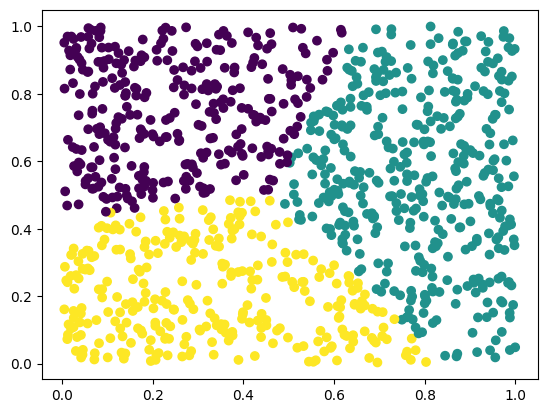

In [13]:
plt.scatter(uniform[:,0], uniform[:,1], c=c_kmeans)

### (2) DBSCAN 分類 `uniform` 數據集

In [14]:
dbscan = DBSCAN(eps=0.2, min_samples=5)

In [15]:
dbscan.fit(uniform)

DBSCAN(eps=0.2)

In [16]:
c_dbscan = dbscan.fit_predict(uniform)

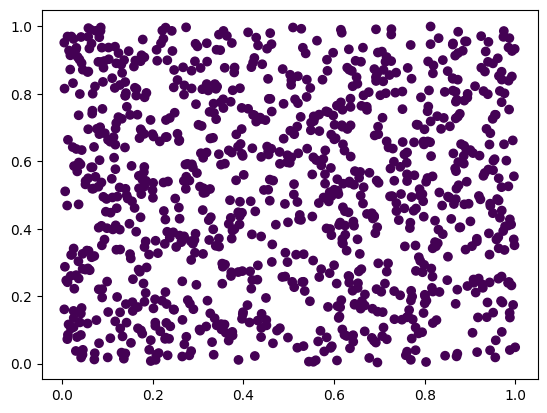

In [17]:
plt.scatter(uniform[:,0], uniform[:,1], c=c_dbscan)

這次我們發現, DBSCAN 什麼也沒做! 知道原理的話, 相信很容易明白為什麼會這樣。

### 3. `blobs` 數據

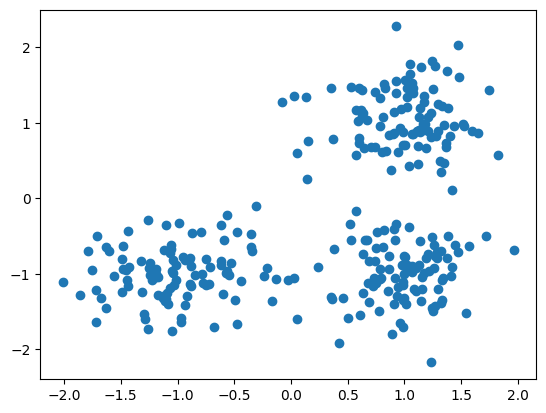

In [ ]:
plt.scatter(blobs[:,0],blobs[:,1])

### (1) 用 K-Means 分類 `blobs` 數據集

In [18]:
kmeans = KMeans(n_clusters=3)

In [19]:
kmeans.fit(blobs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3)

In [20]:
c_kmeans = kmeans.fit_predict(blobs)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


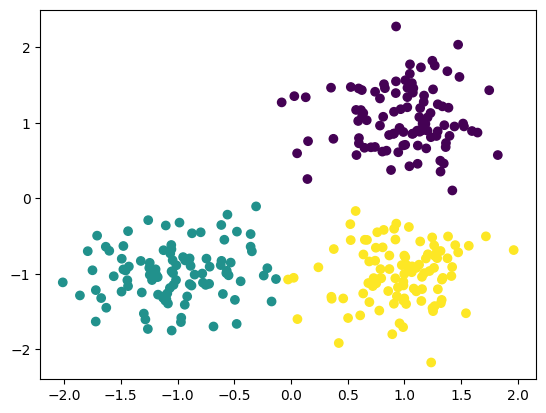

In [21]:
plt.scatter(blobs[:,0],blobs[:,1], c=c_kmeans)

### (2) 用 DBSCAN 分類 `blobs` 數據集

In [22]:
dbscan = DBSCAN(eps=0.2, min_samples=5)

In [23]:
dbscan.fit(blobs)

DBSCAN(eps=0.2)

In [24]:
c_dbscan = dbscan.fit_predict(blobs)

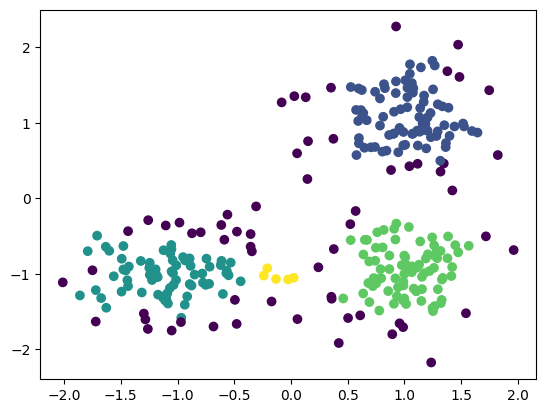

In [25]:
plt.scatter(blobs[:,0], blobs[:,1], c=c_dbscan)

這次 DBSCAN 依然分得怪怪的, 但是可以指出哪些是異常值!

### 4. `moons` 數據

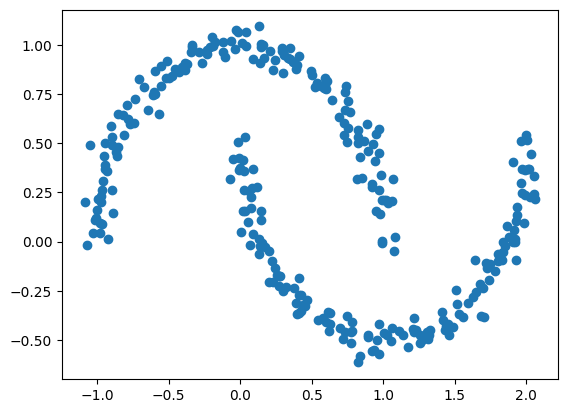

In [26]:
plt.scatter(moons[:,0],moons[:,1])

### (1) 用 K-Means 分類 `moons` 數據集

In [27]:
kmeans = KMeans(n_clusters=2)

In [28]:
kmeans.fit(moons)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [29]:
c_kmeans = kmeans.fit_predict(moons)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


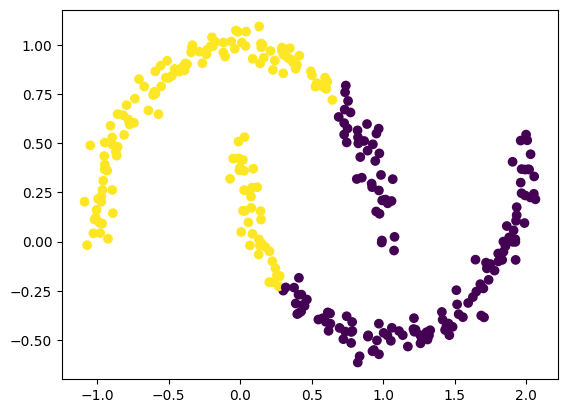

In [30]:
plt.scatter(moons[:,0],moons[:,1], c=c_kmeans)

這樣分可能會覺得有點奇怪...

### (2) 用 DBSCAN 分類 `moons` 數據集

In [31]:
dbscan = DBSCAN(eps=0.2, min_samples=5)

In [32]:
dbscan.fit(moons)

DBSCAN(eps=0.2)

In [33]:
c_dbscan = dbscan.fit_predict(moons)

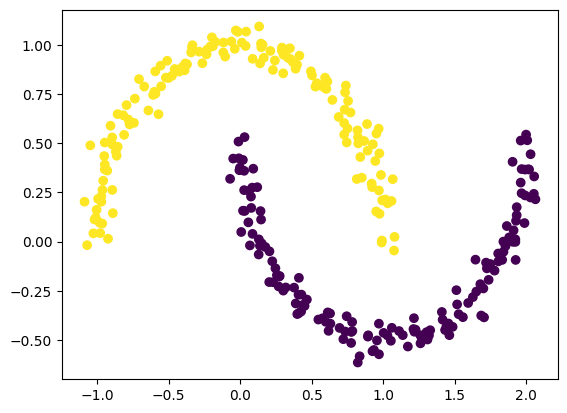

In [34]:
plt.scatter(moons[:,0],moons[:,1], c=c_dbscan)

這次 DBSCAN 分得很好! 這類一群一群「群聚」很明顯的, 正是 DBSCAN 的強項!

### 5. `circles` 數據

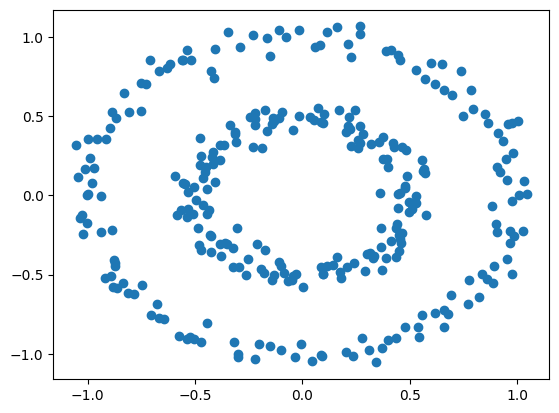

In [35]:
plt.scatter(circles[:,0], circles[:,1])

### (1) 用 K-Means 分類 `circles` 數據集

In [36]:
kmeans = KMeans(n_clusters=2)

In [37]:
kmeans.fit(circles)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [38]:
c_kmeans = kmeans.fit_predict(circles)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


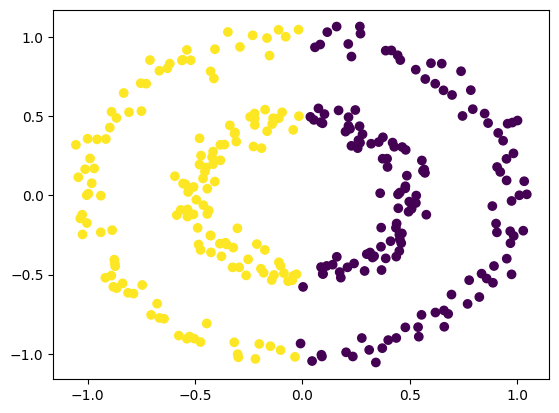

In [39]:
plt.scatter(circles[:,0], circles[:,1], c=c_kmeans)

### (1) 用 DBSCAN 分類 `circles` 數據集

In [40]:
dbscan = DBSCAN(eps=0.2, min_samples=5)

In [41]:
dbscan.fit(circles)

DBSCAN(eps=0.2)

In [42]:
c_dbscan = dbscan.fit_predict(circles)

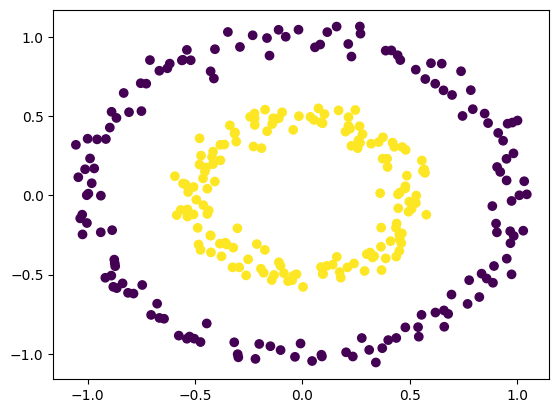

In [43]:
plt.scatter(circles[:,0], circles[:,1], c=c_dbscan)